In [166]:
# Mengimpor library
import numpy as np # digunakan untuk menangani angka 
import pandas as pd # digunakan untuk menangani dataset

#### Dataset yang digunakan merupakan dataset dari Evaluasi Mobil = https://archive.ics.uci.edu/ml/datasets/Car+Evaluation

##### Convert file .txt menjadi .csv

### Exploratory Data Analyst

In [170]:
# Import file CSV(dapat import file .data atau .txt langsung)
header_list = ["buying","maint","doors","persons","lug_boot","safety","class"]
df = pd.read_csv('dataset/car_data.csv', names=header_list) # untuk mengimpor dataset ke dalam variabel

In [171]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [136]:
# Cek missing value
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [137]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # digunakan untuk encoding data kategorikal
# encode categorical data
labelencoder_X = LabelEncoder()
df.iloc[:, 0] = labelencoder_X.fit_transform(df.iloc[:, 0])
df.iloc[:, 1] = labelencoder_X.fit_transform(df.iloc[:, 1])
df.iloc[:, 2] = labelencoder_X.fit_transform(df.iloc[:, 2])
df.iloc[:, 3] = labelencoder_X.fit_transform(df.iloc[:, 3])
df.iloc[:, 4] = labelencoder_X.fit_transform(df.iloc[:, 4])
df.iloc[:, 5] = labelencoder_X.fit_transform(df.iloc[:, 5])
df.iloc[:, 6] = labelencoder_X.fit_transform(df.iloc[:, 6])

In [138]:
df

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,3
1725,1,1,3,2,0,1,2
1726,1,1,3,2,0,2,1


In [139]:
# Cek jumlah setiap kelas label
df['class'].value_counts()

2    1210
0     384
1      69
3      65
Name: class, dtype: int64

### Visualisasi Jumlah Data Kelas Label

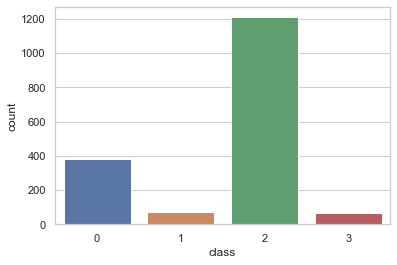

In [140]:
# Visualisasi Data
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
sns.countplot(df['class'])

#plt.savefig(bar_count_label.png)

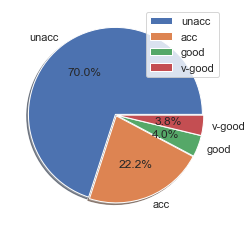

In [141]:
# Visualisasi data ke bentuk pie chart
labels = ['unacc','acc','good','v-good']
explode = (0.01,0.01,0.01,0.01) #explode 1st slice

#plot
fig,ax = plt.subplots()
ax.pie(df['class'].value_counts(), labels=labels, autopct='%.1f%%', explode=explode, shadow=True)
ax.legend(labels,loc='best')
ax.set_aspect('equal')
plt.tight_layout
plt.show()

#plt.savefig('pie.png')

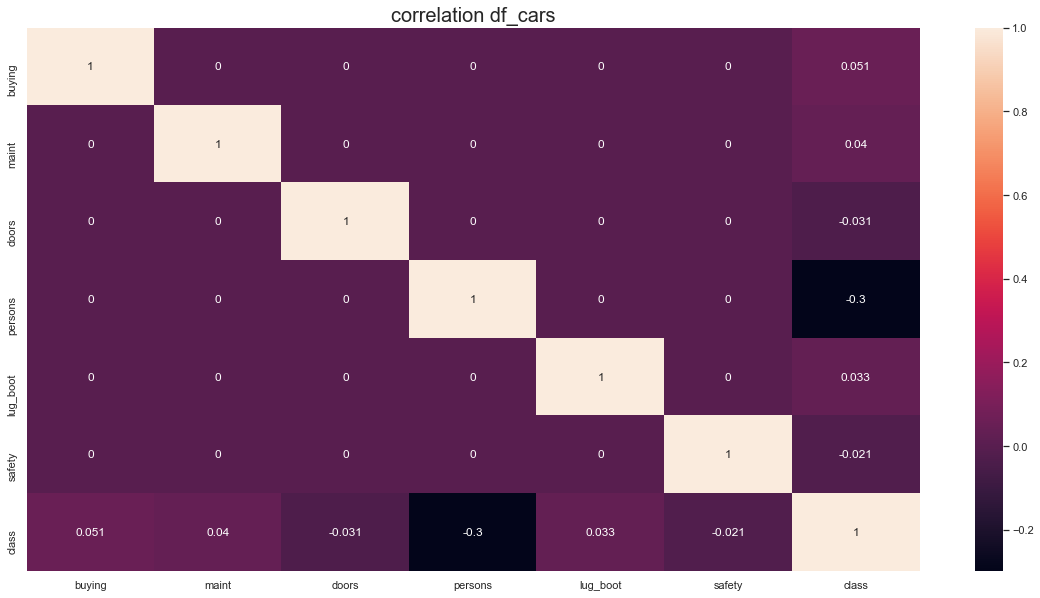

In [142]:
# Import module
import seaborn as sns
import matplotlib.pyplot as plt

# Melihat korelasi dalam dataset Car_Evaluation
df_cars = pd.get_dummies(df)
df_cars_corr = df_cars.corr()

# Visualisasi Data
plt.figure(figsize=(20,10))
sns.heatmap(df_cars_corr,annot=True)
plt.title("correlation df_cars",fontsize =20)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026CB5921DF0>]],
      dtype=object)

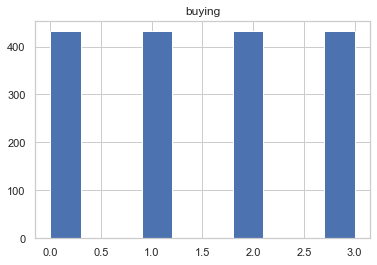

In [143]:
# Data visualisasi dan analisis
df['class'].value_counts()
df.hist(column='buying', bins=10)

In [144]:
# Menampilkan fitur dataset
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

### Ubah bentuk df ke array untuk memudahkan proses pemodelan klasifikasi

In [145]:
# Mengkonvert dataframe Pandas ke array Numpy
X = df[["buying","maint","doors","persons","lug_boot","safety"]] .values  #.astype(float)
print(X[0:5])
# Menampilkan label 5 data
y = df['class'].values
print(y[0:5])

[[3 3 0 0 2 1]
 [3 3 0 0 2 2]
 [3 3 0 0 2 0]
 [3 3 0 0 1 1]
 [3 3 0 0 1 2]]
[2 2 2 2 2]


### Normalisasi data, Penskalaan Fitur

In [146]:
from sklearn.preprocessing import StandardScaler # digunakan untuk penskalaan fitur.
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
X[0:5]

array([[ 1.34164079,  1.34164079, -1.34164079, -1.22474487,  1.22474487,
         0.        ],
       [ 1.34164079,  1.34164079, -1.34164079, -1.22474487,  1.22474487,
         1.22474487],
       [ 1.34164079,  1.34164079, -1.34164079, -1.22474487,  1.22474487,
        -1.22474487],
       [ 1.34164079,  1.34164079, -1.34164079, -1.22474487,  0.        ,
         0.        ],
       [ 1.34164079,  1.34164079, -1.34164079, -1.22474487,  0.        ,
         1.22474487]])

### Splitting the dataset into training set and test set

In [147]:
from sklearn.model_selection import train_test_split # digunakan untuk memisahkan data pelatihan dan pengujian

# Memisahkan kumpulan data menjadi kumpulan data pelatihan dan pengujian
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("Shape feature and target of df_reviews")
print("Shape of X_train :",X_train.shape)
print("Shape of y_train:", Y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", Y_test.shape)

Shape feature and target of df_reviews
Shape of X_train : (1382, 6)
Shape of y_train: (1382,)
Shape of X_test: (346, 6)
Shape of y_test: (346,)


### Proses Pemodelan - Random Forest Classifier

In [148]:
#random forest
from sklearn.ensemble import RandomForestClassifier

##Make module
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)

RandomForestClassifier()

##### Evaluasi Model

In [149]:
from sklearn.model_selection import KFold #Untuk proses KFoldValidation
from sklearn.model_selection import cross_val_score, cross_validate #untuk proses validasi dengan nilai perulangan sesuai nilai K

cv = KFold(n_splits=10, shuffle=True, random_state=1)
accuracy = cross_validate(rf, X_train, Y_train, cv = cv, return_train_score=True)
print('cross validation score', accuracy)

waktu_train = accuracy['fit_time'].mean()
waktu_test = accuracy['score_time'].mean()
train_score = accuracy['train_score'].mean()
validate_score = accuracy['test_score'].mean()
print("====================")
print(waktu_train)
print(waktu_test)
print(train_score)
print(validate_score)

cross validation score {'fit_time': array([0.28648138, 0.26628757, 0.26828241, 0.26719022, 0.2638495 ,
       0.27622581, 0.26401854, 0.26628733, 0.26229715, 0.26329565]), 'score_time': array([0.01695466, 0.01695442, 0.01595688, 0.01595736, 0.01640058,
       0.02094412, 0.01595736, 0.01595736, 0.01496005, 0.01595688]), 'test_score': array([0.99280576, 0.97841727, 0.99275362, 0.98550725, 0.94927536,
       0.97101449, 0.98550725, 0.98550725, 0.98550725, 0.99275362]), 'train_score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])}
0.2684215545654297
0.01659996509552002
1.0
0.9819049108539257


##### Nilai Data Latih dan Data Uji

In [150]:
from sklearn.metrics import confusion_matrix, classification_report
##df_reviews
print("Accuracy Score of model Random Forest")
print("Training of df_reviews :", rf.score(X_train,Y_train))
print("Testing of df_reviews :", rf.score(X_test,Y_test))

Accuracy Score of model Random Forest
Training of df_reviews : 1.0
Testing of df_reviews : 0.976878612716763


In [151]:
from sklearn import metrics 
from sklearn.metrics import classification_report #untuk proses menampilkan evaluasi
from sklearn.metrics import accuracy_score #untuk proses menampilkan hasil akurasi dari proses model klasifikasi
from sklearn.metrics import precision_recall_curve #untuk proses menampilkan hasil presisi dan recall dari proses model klasifikasi
from sklearn.metrics import f1_score #untuk proses menampilkan hasil f1-score dari proses model klasifikasi
from sklearn.metrics import roc_curve, auc #untuk proses menampilkan hasil Area Hitung di Bawah Kurva Karakteristik Operasi 

### Evaluasi dan Prediksi Model

In [152]:
y_pred_rf = rf.predict(X_test)
y_pred_train = rf.predict(X_train)

# Classify and report the results
print(classification_report(Y_test, y_pred_rf))
print('\n')

#print('BEST SVM MODEL')
print('Accuracy Score - RF:', metrics.accuracy_score(Y_test, y_pred_rf)) 

print('Train Score - RF:', metrics.accuracy_score(Y_train, y_pred_train)) 
print('Test Score - RF:', metrics.accuracy_score(Y_test, y_pred_rf)) 

              precision    recall  f1-score   support

           0       0.89      0.98      0.94        59
           1       1.00      0.93      0.96        14
           2       1.00      0.98      0.99       260
           3       1.00      0.92      0.96        13

    accuracy                           0.98       346
   macro avg       0.97      0.95      0.96       346
weighted avg       0.98      0.98      0.98       346



Accuracy Score - RF: 0.976878612716763
Train Score - RF: 1.0
Test Score - RF: 0.976878612716763


In [153]:
y_pred_rf[0:511]

array([2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 3, 2, 1, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 0, 0, 0, 0, 0, 1, 2, 2, 3, 0, 2,
       0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 0, 0, 2, 1, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       1, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 3, 2, 2, 0, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 3, 0, 0, 2, 0, 2, 3, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 0, 2, 2, 0, 2, 2, 2,
       0, 1, 2, 0, 2, 0, 2, 2, 2, 2, 1, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 1, 2, 2, 2, 0, 1, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2,

### Visualisasi Pemodelan

,unacc,acc,good,v-good,accuracy,macro avg,weighted avg
precision,0.892308,1.000000,0.996094,1.000000,0.976879,0.972100,0.978701
recall,0.983051,0.928571,0.980769,0.923077,0.976879,0.953867,0.976879
f1-score,0.935484,0.962963,0.988372,0.960000,0.976879,0.961705,0.977259
support,59.000000,14.000000,260.000000,13.000000,0.976879,346.000000,346.000000


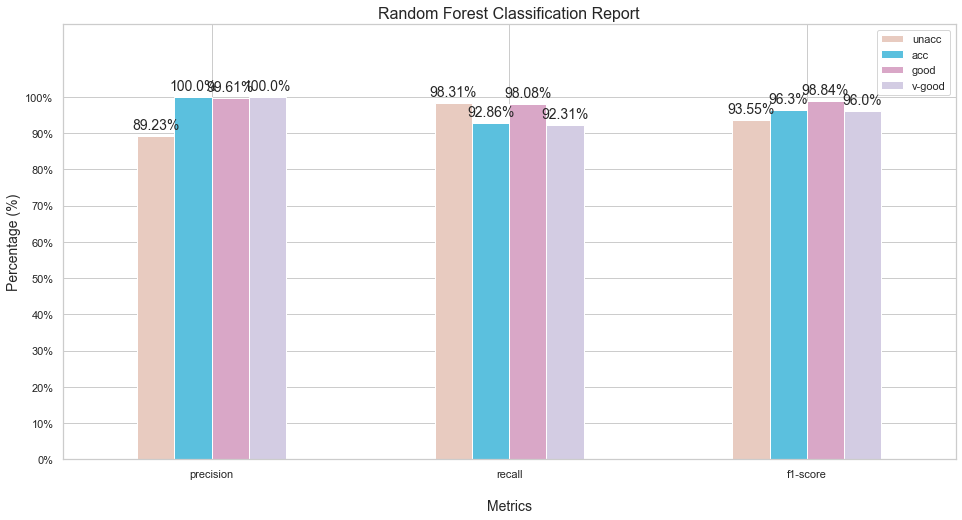

In [154]:
"""
Variabel ini digunakan untuk menampung nama label yang digunakan dalam kolom untuk confusion matrix dan berfungsi sebagai tanda
label di bagian visualisasi dari classification report
"""
target_labels = ['unacc', 'acc', 'good', 'v-good']

#store the classification report as a dictionary
cr_dict = classification_report(Y_test, y_pred_rf, target_names=target_labels, output_dict=True)

#convert the classification report dictionary into a data frame
cr_data = pd.DataFrame(cr_dict)
display(cr_data)

#plot the classification report scores
ax=cr_data.iloc[:-1, :4].plot.bar(figsize=(16,8),color=['#E8CBC0','#5bc0de','#d9a7c7','#D3CCE3'])
plt.title("Random Forest Classification Report", fontsize=16,ha='center')
plt.xlabel('Metrics', labelpad=20, fontsize=14,ha='center')

#fix the x-ticktek mark rotation
plt.xticks(rotation=0)

#create custom y-tick marks and labels for percentage representation
#create an array of even tick marks from 0 to 1
percent_ticks = np.linspace(0,1,11, endpoint=True)

#create a list of strings representing the percentage at each tick
percent_labels = [f'{int(t*100)}%' for t in percent_ticks]
plt.yticks(ticks=percent_ticks,labels=percent_labels)
plt.ylabel('Percentage (%)',  fontsize=14,ha='center')
plt.margins(0.2,0.2)

for p in ax.patches:
    ax.annotate(
        "{}%".format(str(np.round(p.get_height()*100, 2))),
        xy=(p.get_x()*1+p.get_width()/2, p.get_height()*1.02),
        fontsize=14,ha='center',
    )

In [155]:
from sklearn.metrics import confusion_matrix
cm_rf = confusion_matrix(Y_test, y_pred_rf)
print(cm_rf)

[[ 58   0   1   0]
 [  1  13   0   0]
 [  5   0 255   0]
 [  1   0   0  12]]


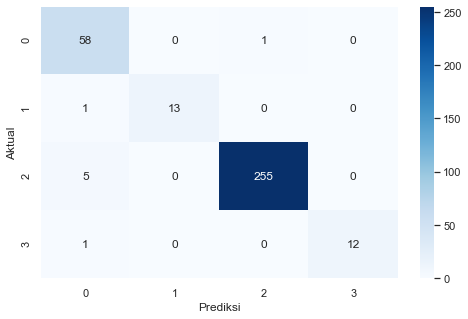

In [156]:
import seaborn as sns

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(Y_test, y_pred_rf), annot=True, fmt=".0f",
ax=ax, cmap='Blues')
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

### Proses Pemodelan - Support Vector Machine

In [157]:
# #decision tree
# from sklearn.tree import DecisionTreeClassifier

#svm
from sklearn.svm import SVC

##Make module
svm = SVC()
svm.fit(X_train,Y_train)

SVC()

In [158]:
from sklearn.model_selection import KFold #Untuk proses KFoldValidation
from sklearn.model_selection import cross_val_score, cross_validate #untuk proses validasi dengan nilai perulangan sesuai nilai K

cv = KFold(n_splits=10, shuffle=True, random_state=1)
accuracy = cross_validate(svm, X_train, Y_train, cv = cv, return_train_score=True)
print('cross validation score', accuracy)

waktu_train = accuracy['fit_time'].mean()
waktu_test = accuracy['score_time'].mean()
train_score = accuracy['train_score'].mean()
validate_score = accuracy['test_score'].mean()
print("====================")
print(waktu_train)
print(waktu_test)
print(train_score)
print(validate_score)

cross validation score {'fit_time': array([0.05584836, 0.05330014, 0.05189395, 0.05186486, 0.05386305,
       0.05290794, 0.05285907, 0.0518713 , 0.05186462, 0.05186129]), 'score_time': array([0.00398898, 0.00464296, 0.00399685, 0.00398827, 0.0039866 ,
       0.00398803, 0.00294328, 0.00404453, 0.0039382 , 0.00398946]), 'test_score': array([0.8705036 , 0.89208633, 0.89130435, 0.88405797, 0.89855072,
       0.89855072, 0.88405797, 0.93478261, 0.87681159, 0.87681159]), 'train_score': array([0.92115849, 0.92437651, 0.92604502, 0.9244373 , 0.94292605,
       0.92524116, 0.92926045, 0.93167203, 0.92282958, 0.92041801])}
0.05281345844268799
0.003950715065002441
0.9268364577971043
0.8907517464289437


##### Nilai Data Latih dan Data Uji

In [159]:
from sklearn.metrics import confusion_matrix, classification_report
##df_reviews
print("Accuracy Score of model Support Vector Machine")
print("Training of df_reviews :", svm.score(X_train,Y_train))
print("Testing of df_reviews :", svm.score(X_test,Y_test))

Accuracy Score of model Support Vector Machine
Training of df_reviews : 0.9370477568740955
Testing of df_reviews : 0.8959537572254336


### Evaluasi dan Prediksi Model

In [160]:
y_pred_svm = dt.predict(X_test)
y_pred_train = dt.predict(X_train)

# Classify and report the results
print(classification_report(Y_test, y_pred_svm))
print('\n')

#print('BEST SVM MODEL')
print('Accuracy Score - SVM:', metrics.accuracy_score(Y_test, y_pred_svm)) 

print('Train Score - SVM:', metrics.accuracy_score(Y_train, y_pred_train)) 
print('Test Score - SVM:', metrics.accuracy_score(Y_test, y_pred_svm)) 

              precision    recall  f1-score   support

           0       0.65      0.86      0.74        59
           1       1.00      0.07      0.13        14
           2       0.97      0.95      0.96       260
           3       1.00      0.85      0.92        13

    accuracy                           0.90       346
   macro avg       0.90      0.68      0.69       346
weighted avg       0.92      0.90      0.89       346



Accuracy Score - SVM: 0.8959537572254336
Train Score - SVM: 0.9370477568740955
Test Score - SVM: 0.8959537572254336


In [161]:
y_pred_svm[0:511]

array([2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 3, 2, 0, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 3, 0, 2,
       0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 0, 2, 2, 2,
       2, 0, 3, 0, 2, 3, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 3, 2, 2, 0, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 3, 0, 0, 2, 0, 2, 3, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2,
       0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0,
       2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2,

,unacc,acc,good,v-good,accuracy,macro avg,weighted avg
precision,0.645570,1.000000,0.968627,1.000000,0.895954,0.903549,0.915988
recall,0.864407,0.071429,0.950000,0.846154,0.895954,0.682997,0.895954
f1-score,0.739130,0.133333,0.959223,0.916667,0.895954,0.687088,0.886677
support,59.000000,14.000000,260.000000,13.000000,0.895954,346.000000,346.000000


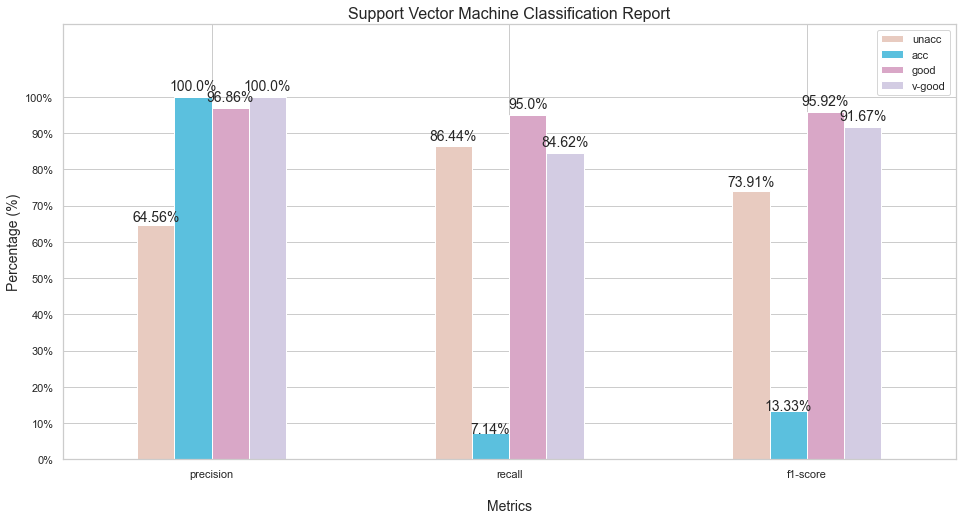

In [162]:
"""
Variabel ini digunakan untuk menampung nama label yang digunakan dalam kolom untuk confusion matrix dan berfungsi sebagai tanda
label di bagian visualisasi dari classification report
"""
target_labels = ['unacc', 'acc', 'good', 'v-good']

#store the classification report as a dictionary
cr_dict = classification_report(Y_test, y_pred_svm, target_names=target_labels, output_dict=True)

#convert the classification report dictionary into a data frame
cr_data = pd.DataFrame(cr_dict)
display(cr_data)

#plot the classification report scores
ax=cr_data.iloc[:-1, :4].plot.bar(figsize=(16,8),color=['#E8CBC0','#5bc0de','#d9a7c7','#D3CCE3'])
plt.title("Support Vector Machine Classification Report", fontsize=16,ha='center')
plt.xlabel('Metrics', labelpad=20, fontsize=14,ha='center')

#fix the x-ticktek mark rotation
plt.xticks(rotation=0)

#create custom y-tick marks and labels for percentage representation
#create an array of even tick marks from 0 to 1
percent_ticks = np.linspace(0,1,11, endpoint=True)

#create a list of strings representing the percentage at each tick
percent_labels = [f'{int(t*100)}%' for t in percent_ticks]
plt.yticks(ticks=percent_ticks,labels=percent_labels)
plt.ylabel('Percentage (%)',  fontsize=14,ha='center')
plt.margins(0.2,0.2)

for p in ax.patches:
    ax.annotate(
        "{}%".format(str(np.round(p.get_height()*100, 2))),
        xy=(p.get_x()*1+p.get_width()/2, p.get_height()*1.02),
        fontsize=14,ha='center',
    )

In [163]:
from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(Y_test, y_pred_svm)
print(cm_svm)

[[ 51   0   8   0]
 [ 13   1   0   0]
 [ 13   0 247   0]
 [  2   0   0  11]]


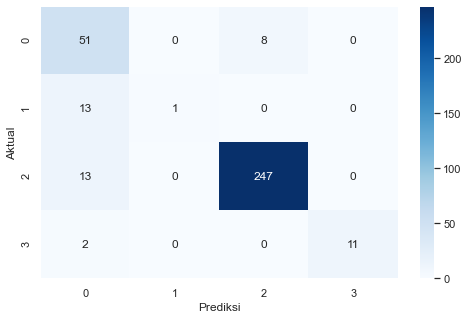

In [164]:
import seaborn as sns

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(Y_test, y_pred_svm), annot=True, fmt=".0f",
ax=ax, cmap='Blues')
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

### Perbandingan hasil klasifikasi model algoritma Random Forest dengan SVM

,Random Forest,Support Vector Machine
Accuracy,0.976879,0.895954


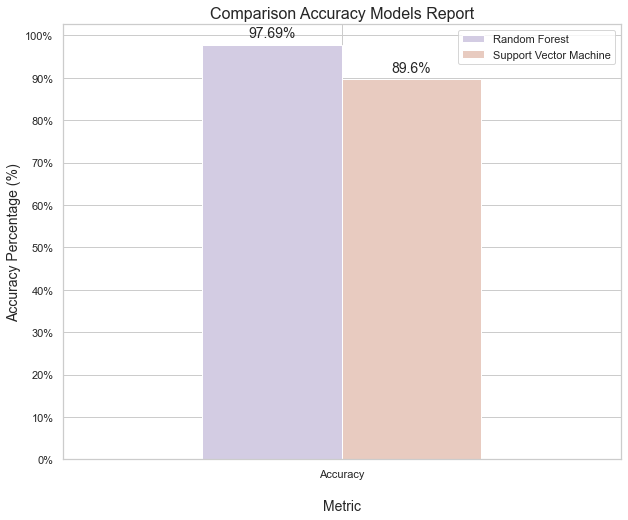

In [165]:
#store the classification report as a dictionary
clf_rf = metrics.accuracy_score(Y_test, y_pred_rf)
clf_svm = metrics.accuracy_score(Y_test, y_pred_svm)
cr_dict = [clf_rf, clf_svm, clf_svm]

#convert the classification report dictionary into a data frame
cr_data = pd.DataFrame({
    "Random Forest":[clf_rf],
    "Support Vector Machine":[clf_svm],
},
index = ["Accuracy"])
display(cr_data)

ax = cr_data.plot.bar(figsize=(10,8),color=['#D3CCE3','#E8CBC0'])
#plt.bar(cr_data, figsize=(10,8),color=['#5bc0de', '#d8634f'])
plt.title("Comparison Accuracy Models Report",fontsize=16,ha='center')
plt.xlabel('Metric', labelpad=20, fontsize=14,ha='center')

#fix the x-tick mark rotation
plt.xticks(rotation=0)

#create custom y-tick marks and labels for percentage representation
#create an array of even tick marks from 0 to 1
percent_ticks = np.linspace(0,1,11, endpoint=True)

#create a list of strings representing the percentage at each tick
percent_labels = [f'{int(t*100)}%' for t in percent_ticks]
plt.yticks(ticks=percent_ticks,labels=percent_labels)
plt.ylabel('Accuracy Percentage (%)', fontsize=14,ha='center')

for p in ax.patches:
    ax.annotate(
        "{}%".format(str(np.round(p.get_height()*100, 2))),
        xy=(p.get_x()*1+p.get_width()/2, p.get_height()*1.02),
        ha='center', fontsize=14)